In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Descarga y extracción del set de datos
print("Descargando ZIP de datos")
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
carpeta_zip = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=url, extract=True)

Descargando ZIP de datos
68616192/68606236 [==============================] - 0s 0us/step


In [3]:
#Variables para rutas en disco
carpeta_base = os.path.join(os.path.dirname(carpeta_zip), 'cats_and_dogs_filtered')
carpeta_entrenamiento = os.path.join(carpeta_base, 'train')
carpeta_validacion = os.path.join(carpeta_base, 'validation')

carp_entren_gatos = os.path.join(carpeta_entrenamiento, 'cats')  # imagenes de gatos para pruebas
carpeta_entren_perros = os.path.join(carpeta_entrenamiento, 'dogs')  # imagenes de perros para pruebas
carpeta_val_gatos = os.path.join(carpeta_validacion, 'cats')  # imagenes de gatos para validacion
carpeta_val_perros = os.path.join(carpeta_validacion, 'dogs')  # imagenes de perros para validacion

In [4]:
#Guardar el numero de datos de entrenamiento para cada cosa
num_gatos_entren = len(os.listdir(carp_entren_gatos))
num_perros_entren = len(os.listdir(carpeta_entren_perros))
num_gatos_val = len(os.listdir(carpeta_val_gatos))
num_perros_val = len(os.listdir(carpeta_val_perros))
total_entrenamiento = num_gatos_entren + num_perros_entren
total_val = num_gatos_val + num_perros_val

TAMANO_LOTE = 100
TAMANO_IMG = 150

In [5]:
#Aumento de datos (escala, rotacion, blabla)
print("Realizando aumento de datos")
image_gen_entrenamiento = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Realizando aumento de datos


In [6]:

#Generacion de datos de entrenamiento FTW
data_gen_entrenamiento = image_gen_entrenamiento.flow_from_directory(batch_size=TAMANO_LOTE,
                                                     directory=carpeta_entrenamiento,
                                                     shuffle=True,
                                                     target_size=(TAMANO_IMG,TAMANO_IMG),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [7]:
#Generacion de datos de validacion
image_gen_val = ImageDataGenerator(rescale=1./255)

data_gen_validacion = image_gen_val.flow_from_directory(batch_size=TAMANO_LOTE,
                                                 directory=carpeta_validacion,
                                                 target_size=(TAMANO_IMG, TAMANO_IMG),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [8]:
#Modelo!
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [9]:
#Compilación
modelo.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:

#Entrenar la red. Toma un buen rato! Ve por un café ;)
#Oye suscribete al canal!
print("Entrenando modelo...");
epocas=10
history = modelo.fit_generator(
    data_gen_entrenamiento,
    steps_per_epoch=int(np.ceil(total_entrenamiento / float(TAMANO_LOTE))),
    epochs=epocas,
    validation_data=data_gen_validacion,
    validation_steps=int(np.ceil(total_val / float(TAMANO_LOTE)))
)

print("Modelo entrenado!");

Entrenando modelo...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/10
20/20 [==============================] - 30s 850ms/step - loss: 0.7340 - accuracy: 0.4990 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 17s 850ms/step - loss: 0.6917 - accuracy: 0.5210 - val_loss: 0.6871 - val_accuracy: 0.5130
Epoch 3/10
20/20 [==============================] - 17s 864ms/step - loss: 0.6900 - accuracy: 0.5255 - val_loss: 0.6775 - val_accuracy: 0.6090
Epoch 4/10
20/20 [==============================] - 17s 871ms/step - loss: 0.6829 - accuracy: 0.5415 - val_loss: 0.6732 - val_accuracy: 0.5460
Epoch 5/10
20/20 [==============================] - 17s 846ms/step - loss: 0.6814 - accuracy: 0.5485 - val_loss: 0.6833 - val_accuracy: 0.5200
Epoch 6/10
20/20 [==============================] - 17s 845ms/step - loss: 0.6693 - accuracy: 0.6025 - val_loss: 0.6485 - val_accuracy: 0.6180
Epoch 7/10
20/20 [==============================] - 17s 847ms/step - loss: 0.6562 - accuracy: 0.6160 - val_loss: 0.6370 - val_accuracy: 0.6450

In [11]:
modelo.evaluate(data_gen_validacion)

10/10 [==============================] - 3s 277ms/step - loss: 0.5903 - accuracy: 0.6870


[0.5903037786483765, 0.6869999766349792]

In [12]:
#Exportar el modelo en formato h5
modelo.save('perros-gatos.h5')

dog


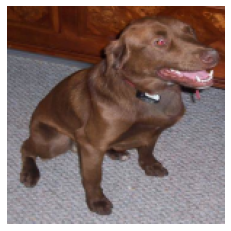

In [15]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model
import cv2

names = ['cat', 'dog']

modelt = load_model('perros-gatos.h5')

imaget_path = "/content/imagenprueba.jpg"
imaget=cv2.resize(cv2.imread(imaget_path), (150, 150), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)

pred = modelt.predict(xt)

print(names[np.argmax(pred)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()